# **Environmental SetUp 🌿**

This section aims at **setting up the environment** for the **rest of the notebook**. For the implementation of **reinforcement learning** and their **methods**. We will need **certain libraries**, all these libraries are imported here,

In [14]:
!pip install gym==0.25.2
!pip install gym[atari]==0.25.2

In [117]:
import os
import gym
import torch
import numpy as np
from torch import nn
import moviepy.editor
import matplotlib.pyplot as plt
from collections import namedtuple
from gym.wrappers.monitoring.video_recorder import VideoRecorder

  and should_run_async(code)



**Prerequested knowledge**: You're expected to know about reinforcement learning, Open AI gym and a bit of Machine Learning and Deep Learning.

# **RL Terminalogies 📖**

---

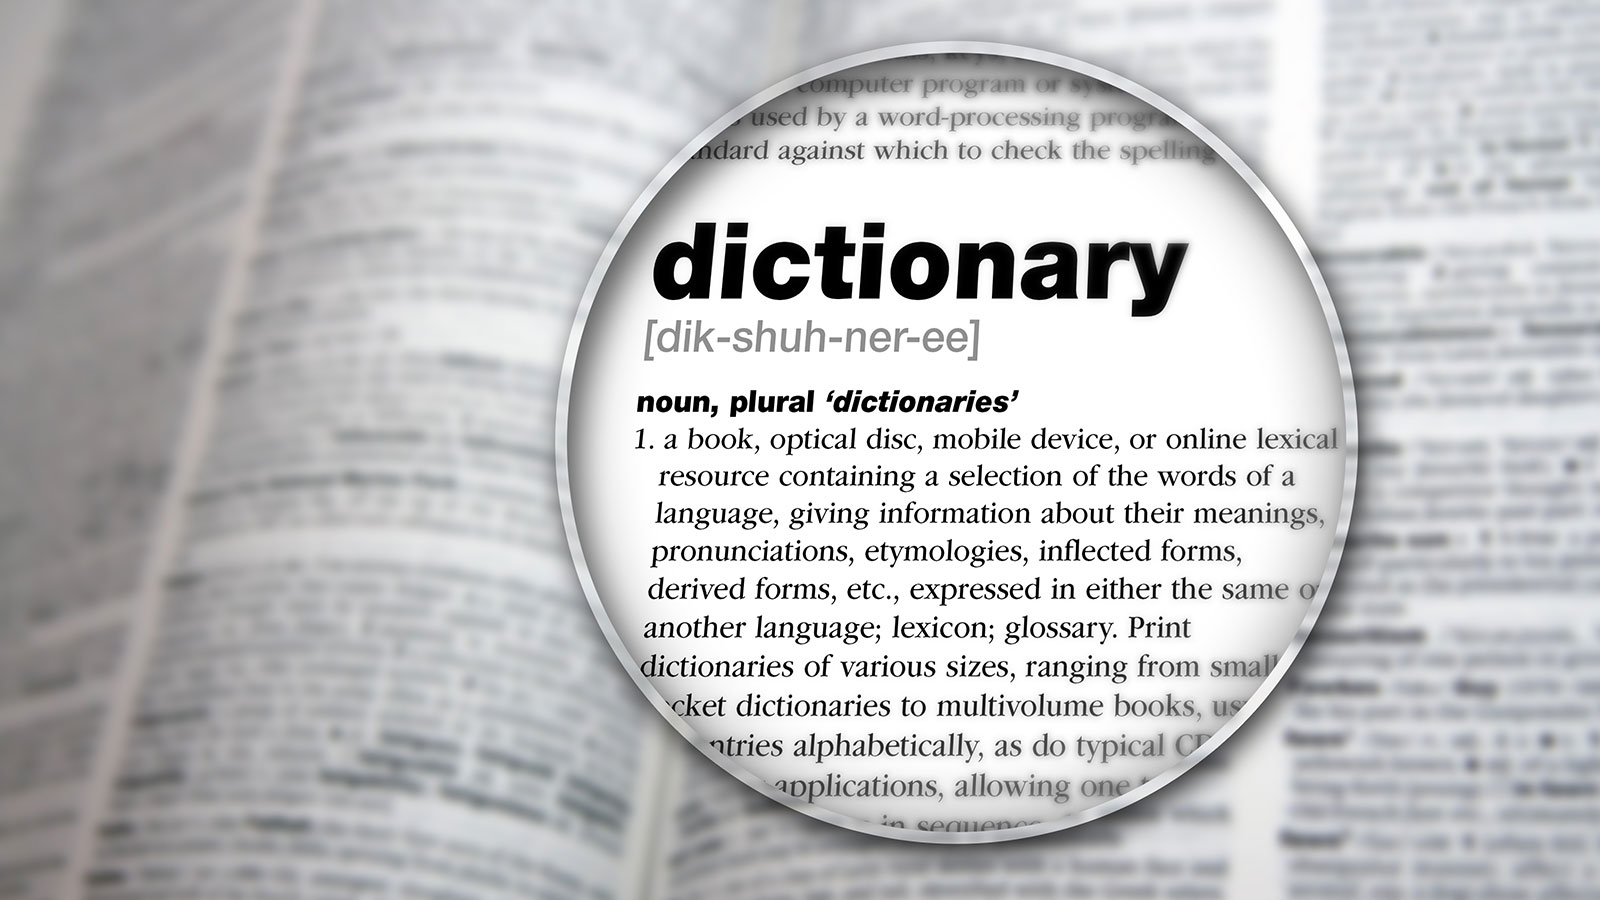

In the realm of **Reinforcement Learning (RL),** comprehending the fundamental terminologies is paramount to navigating its rich landscape effectively. Various methodologies in RL can be distilled **into distinct categories**, illuminating their core characteristics:

* $Model-free$ or $Model-based$
* $Value-based$ or $Policy-based$
* $On-policy$ or $Off-policy$

----
Let's venture into the vibrant realm of Reinforcement Learning (RL) methodologies, breaking down the terminologies to unveil their essence.

1. **Model-Free vs. Model-Based:** Picture the agent in the RL environment as either a learned predictor or a straightforward executor. A model-free approach embodies an agent devoid of a predictive framework, relying on computation to directly determine actions. Conversely, in the model-based paradigm, the agent harnesses a predictive model to anticipate the optimal moves, enhancing decision-making prowess.

   🎲 **Model-free methods** thrive in intricate, dynamic landscapes, steering away from complex predictive models. Conversely, **model-based strategies** shine in more predictable settings or structured games, utilizing models to forecast the best course of action.

2. **Policy-Based vs. Value-Based:** Now, envision the agent's strategy—does it delve into predicting action probabilities or gauge action values? In policy-based methods, the agent forecasts the likelihood of each action, while in value-based approaches, the focus is on estimating the merit of each potential action.

   📊 **Policy-based** techniques ponder over probabilities akin to an astute gambler, whereas **value-based methods** scrutinize the potential worth of actions akin to a wise investor evaluating assets.

3. **On-Policy vs. Off-Policy:** Here, we peek into the agent's memory—is it tethered solely to the current policy or does it possess a catalog of past experiences? An on-policy model adheres strictly to the current policy without reminiscence, while an off-policy counterpart retains and leverages past encounters.

   🧠 An **on-policy** approach lives in the present, reacting without reminiscing, akin to a mindful explorer navigating a maze anew. Conversely, **off-policy** methods learn from past escapades, akin to a seasoned historian drawing wisdom from historical chronicles.


---
Based on this, the **Cross Entropy Method** is a $Model-Based$, $Policy-Based$ and $On-Policy$ Method.

# **Cross Entropy Agent 🤖**

---

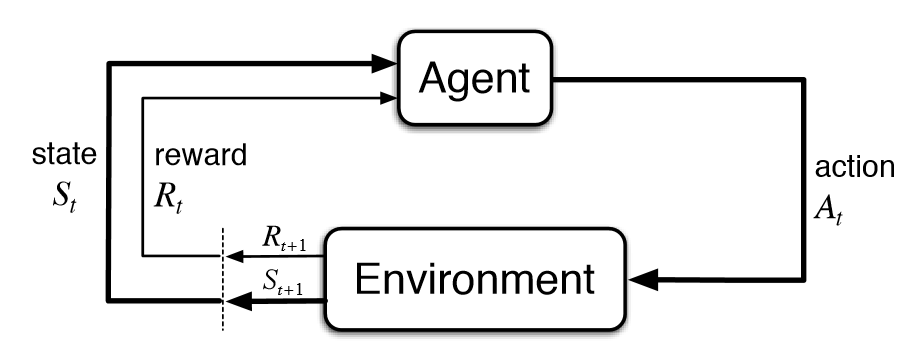

In the vast expanse of **reinforcement learning**, the **Cross Entropy Method** emerges as a **pivotal cornerstone**, often hailed as the **bedrock of this dynamic field**. While it might **not flaunt the limelight** like the **flashy deep Q-networks**, its allure lies in its **elegant simplicity and foundational significance.**

At its nucleus stands the **agent**, akin to a **savvy neural network** on a **classification mission**, entrusted with **decision-making prowess** derived from **observations or states**. Its noble quest? To chart a course from these states to probabilities, thereby **crafting a policy** that steers potential actions.

> The **brilliance** of the **Cross Entropy Method** resides in its **kinship with classification principles**. Just as a **neural network adeptly predicts classes**, our **intrepid agent learns to foresee actions based on states**, employing **the policy as a guiding beacon in a sea of potential choices.**

> This **method's effectiveness** hinges on harnessing the **likeness between action prediction and classification**. By embracing and adapting **the tenets governing classification tasks**, we unearth **invaluable insights** into fortifying the **agent's decision-making finesse** within the **realm of reinforcement learning**.

In this vibrant landscape, an **agent's odyssey** unfurls across episodes, each narrating a **tale of observation, action, and reward**. Here, the reward in each episode dons the cloak of a **"loss function"** within **the grand tapestry of the Cross Entropy Method**.

The primary mandate within this framework is clear-cut: to **minimize detrimental or "bad" rewards while concurrently maximizing the occurrence of beneficial or "good" rewards**. This method seeks to **amplify cumulative rewards** over **numerous episodes** by astutely mitigating adverse outcomes and **amplifying advantageous ones**.

The structured choreography of the **Cross Entropy Method** can be distilled into a concise yet potent **choreographed sequence**:

1. **Episode Iteration**: The agent embarks on an interactive journey with the environment across numerous episodes, honing its skills through experiential learning.

2. **Reward Evaluation**: Tallying up rewards per episode while setting a benchmark for what is deemed an acceptable reward.

3. **Selection**: Parting ways with episodes that fall below the established threshold, akin to choosing only the ripest fruits from the orchard.

4. **Model Refinement**: Training and refining the model by focusing on episodes that meet or surpass the set threshold, akin to distilling wisdom from the most fruitful experiences.

5. **Iterative Refinement**: Engaging in a cyclic process of continuous improvement, perpetually enhancing the model's capabilities until it achieves a gratifying performance zenith.

# **Intuitive Implementation 🧑‍💻**

---

Now, with the groundwork laid, let's delve into the enchanting world of the **Cross Entropy Method** by crafting a **simple neural network**. Just as an **artist** wields a brush to create a **masterpiece**, we'll weave a digital tapestry using this **method's artistic strokes** within the **canvas of reinforcement learning.**


---
At its core, this method operates on a **seemingly simple yet profound concept**. Picture this: when the **agent's weights are untrained**, it sets off on its journey by taking **random actions**, mirroring the unrefined distributions it operates within.

> **This initial phase is akin to a young artist's first strokes on a blank canvas—unstructured, spontaneous, and essentially random.**

Amidst this **randomness**, the **agent gathers rewards** as it navigates through the environment. Across episodes or training iterations, these **initially random actions** undergo a **metamorphosis**. Gradually, they shed their randomness and **evolve into informed choices**, drawing wisdom from the **states they encounter along the way.**

> As training progresses, the agent, much like an **astute scholar**, discerns that **specific conditions within various states demand particular actions**. Leveraging the intricate architecture of its **neural network**, the agent **extrapolates and generalizes these learned associations across diverse states.**

Through this iterative process of **exploration and refinement**, these **once-random actions transcend into strategic choices**. Driven by the agent's astute exploitation of **learned patterns**, a fascinating transformation unfolds—cumulative rewards steadily surge and ascend throughout the training journey.

> As the canvas starts to fill with these **random strokes**, the **artist observes a pattern**—a combination of **certain strokes** begins to form the semblance of **a captivating landscape** or a **poignant portrait**. The artist notices that **specific strokes**, when **judiciously placed and combined**, evoke a **sense of beauty and harmony**. These strokes, **once seemingly random**, now hold the **potential to craft informed decisions**, akin to the **agent gathering rewards in the environment.**


This evolution, akin to a symphony conducted by the agent's learning process, showcases the profound power and adaptability nestled within the Cross-Entropy Method.

In [104]:
# The first and foremost requirement is the Agent's brain
class Agent(nn.Module):

    def __init__(self, obs_space, hidden_dims, action_space):
        super(Agent, self).__init__()

        self.agent = nn.Sequential(
            nn.Linear(obs_space, hidden_dims),
            nn.ReLU(),
            nn.Linear(hidden_dims, action_space)
        )

    def forward(self, state):
        return self.agent(state)

  and should_run_async(code)



In our current setup, **our agent's brain** is **pretty tiny** and **straightforward**, perfect for handling the **cart pole environment**. But you know what? Sometimes, complexity is just too much to handle. So, we've left the door open for **our agent's brain to expand and get more intricate if needed**.

Imagine this brain growing from **handling simple tasks** like **balancing a pole** to **tackling more complex stuff**, like **diving into images** with **convolutional networks** or even **understanding text with RNNs** (those recurrent neural networks are quite something!).

We're even open to **inventing a whole new kind of neural network** if that's what it takes! **Flexibility** is the **name of the game** when it comes to **letting our agent adapt to whatever challenges come its way.**

---
In order to effectively utilize this agent, crucial information about the environment remains necessary. This includes essential details such as the size of observations it can access and the range of actions it can take within the environment.


In [105]:
# Initialize Gym Environment
env = gym.make('CartPole-v1')

# Collect information about the Observation Space
obs_space = env.observation_space
obs_size = obs_space.shape[0]
obs_size

  deprecation(

  deprecation(



4

Understanding that the **observation space** consists of **4 discrete variables** implies that the model operates within an **environment** where it receives **4 distinct features** or **descriptors as inputs**.

In [106]:
# Action Space Information
act_space = env.action_space
act_size = act_space.n
act_space

Discrete(2)

In [107]:
# Initialize the Agent (A simple Neural Network)
agent = Agent(obs_size, 32, act_size)
agent

Agent(
  (agent): Sequential(
    (0): Linear(in_features=4, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=2, bias=True)
  )
)

The model operates with **2 discrete actions**. Correspondingly, it maps the **4 observed features** to these **2 distinct labels**, essentially translating from the **observation space to the action space**.

This **mapping process** allows the model to **interpret the information gathered** from its **environment** and **make decisions** by associating the **observed features with appropriate actions.**

In [108]:
BATCH_SIZE = 32
PERCENTILE = 70                             # It's representing 70% of the rewards gained.

The next step involves crafting **the dataset** to **train the agent**. Notably, the **agent doesn't possess predefined labels**; its **primary objective** is to **navigate the environment,** discern **optimal actions**, and **subsequently exploit and refine its interactions within the environment.**

The model's strategy entails **initially taking random actions** and **cataloging these encounters**. Eventually, it scrutinizes these **random actions**, identifying the **most promising ones** to exploit over time. This iterative process enables the model to enhance its **decision-making**, **progressively learning** and **improving its approach based on prior experiences** in the environment.

In [109]:
# These are just fot better representation
Episode = namedtuple("Episode", ['reward', 'steps'])
EpStep = namedtuple('EpStep', ['state', 'action'])

Because we are aware of the fact that action will be taken based on the **probabilities generated by the agent**, we can create a function that will do this for us.

In [110]:
sm = nn.Softmax(dim=1)
action_space = range(act_size)

def act(logits, action_space = action_space, sm = sm):
    probas = sm(logits).detach().numpy()[0]
    return np.random.choice(action_space, p=probas)

In [111]:
def get_batch(env = env, agent = agent, batch_size = BATCH_SIZE):

    batch = []
    ep_step = []
    ep_rs = 0.0

    # Set Initial State
    obs = env.reset()
    while True:

        obs_v = torch.FloatTensor([obs])
        action = act(agent(obs_v), range(env.action_space.n))
        next_obs, reward, done, _ = env.step(action)

        # Update Information
        ep_rs += reward
        ep_step.append(
            EpStep(
                state = obs,
                action = action
            )
        )

        if done:
            batch.append(
                Episode(
                    reward = ep_rs,
                    steps = ep_step
                )
            )
            ep_step = []
            ep_rs = 0.0
            next_obs = env.reset()

            if len(batch)==batch_size:
                yield batch
                batch = []

        obs = next_obs

The function provided **generates all batches of episodes**. However, aligning with **our solution statement**, we specifically seek **elite observations and rewards**. Thus, the **next step** involves **filtering these batches** to **isolate and focus solely** on the **elite rewards** and associated **observations**.

In [112]:
def get_train_set(batch, percentile = PERCENTILE):

    rewards = [episode.reward for episode in batch]
    reward_boundary = np.percentile(rewards, percentile)
    reward_mean = float(np.mean(rewards))

    train_obs, train_acts = [], []

    for episode in batch:
        if episode.reward > reward_boundary:
            train_obs.extend([step.state for step in episode.steps])
            train_acts.extend([step.action for step in episode.steps])

    train_obs_v = torch.FloatTensor(train_obs)
    train_acts_v = torch.LongTensor(train_acts)

    return train_obs_v, train_acts_v, reward_boundary, reward_mean

Now we have everything we need. It's time to create the training loop.

In [113]:
# Loss function and Agent optimizer
loss_fn = nn.CrossEntropyLoss()
agent_optim = torch.optim.Adam(agent.parameters(), lr=0.1)

# Recorded information during training loop
mean_rewards = []
reward_bounds = []
agent_loss = []

In [114]:
# The training loop
for ep, batch in enumerate(get_batch()):
    train_obs, train_acts, reward_bound, mean_reward = get_train_set(batch, PERCENTILE)

    agent_optim.zero_grad()

    agent_acts = agent(train_obs)
    loss = loss_fn(agent_acts, train_acts)

    loss.backward()
    agent_optim.step()

    mean_rewards.append(mean_reward)
    reward_bounds.append(reward_bound)
    agent_loss.append(loss.item())

    print(f"Ep: {ep + 1:2} Mean Reward: {mean_reward:5.5} Reward Boundary: {reward_bound:5.5} Percentile: {float(PERCENTILE):2.2}")

    if mean_reward > 400: # Higher the threshold Longer the agent can play (PERCENTILE will have to decrease)
        break

    PERCENTILE -= PERCENTILE * 0.02

Ep:  1 Mean Reward: 21.938 Reward Boundary:  21.0 Percentile: 7e+01
Ep:  2 Mean Reward: 23.75 Reward Boundary: 27.33 Percentile: 6.9e+01
Ep:  3 Mean Reward: 48.75 Reward Boundary: 61.841 Percentile: 6.7e+01
Ep:  4 Mean Reward: 34.156 Reward Boundary: 36.424 Percentile: 6.6e+01
Ep:  5 Mean Reward:  57.5 Reward Boundary: 52.031 Percentile: 6.5e+01
Ep:  6 Mean Reward: 54.938 Reward Boundary:  56.0 Percentile: 6.3e+01
Ep:  7 Mean Reward: 71.688 Reward Boundary: 72.337 Percentile: 6.2e+01
Ep:  8 Mean Reward: 71.938 Reward Boundary:  74.0 Percentile: 6.1e+01
Ep:  9 Mean Reward: 65.812 Reward Boundary:  68.0 Percentile: 6e+01
Ep: 10 Mean Reward: 60.375 Reward Boundary: 59.185 Percentile: 5.8e+01
Ep: 11 Mean Reward: 65.094 Reward Boundary: 64.461 Percentile: 5.7e+01
Ep: 12 Mean Reward: 74.719 Reward Boundary: 75.128 Percentile: 5.6e+01
Ep: 13 Mean Reward: 89.031 Reward Boundary: 83.057 Percentile: 5.5e+01
Ep: 14 Mean Reward: 96.781 Reward Boundary: 91.688 Percentile: 5.4e+01
Ep: 15 Mean Reward

Alright, let's break down this code into a simpler, more understandable form:

1. Imagine **our agent** is **starting out fresh**, making **random moves** in the **environment** because it **doesn't know better**—it's like **exploring a new game without any instructions**. Surprisingly, some of **these random moves** turn out to be **really good, earning the agent rewards**. We keep **track of these good moves**, calling them the **"elite" actions and observations.**

2. Now, armed with this knowledge of what works well, we **tell our agent to focus only on making moves similar to these successful ones**. The agent essentially **learns from its own successful actions**. To help it learn better, we compare its **new moves** to the **ones that worked before**, using something called **"cross-entropy loss".** This comparison guides the agent to **mimic its successful moves**, improving its **overall performance**.

3. To make things clearer, we set a **goal for our agent**—let's say, reaching an **average score of 400**. Once it consistently **hits this score**, we consider it **mastered the game**. But keep in mind, **every game might have different criteria for what makes the agent good at it.**

So, in a nutshell, our agent learns from its own **good moves**, aiming to **replicate them** and **achieve a specific goal in the game.**

---
Imagine our model is **learning and getting better** at **making decisions** in **the environment**. Towards the **end of training**, it starts **making incredibly good decisions**, **boosting its performance remarkably**. Now, if we set a **fixed boundary or percentile** at the very start, **this boundary might end up much higher than the typical rewards** the model achieves during regular stages of learning.

By using this **percentile as a filter for our batches**, towards the end of training, **we might end up with batches that contain nothing because the boundary is set too high**. It's like setting the bar too high for the model's achievements.

To address this, we **dynamically decrease** the **percentile** as **training progresses**. This approach allows us to **adapt the boundary** to match the **model's evolving performance**. Witnessing this change in action by commenting out the line can help visualize how the **evolving percentile** helps in **selecting meaningful batches** throughout the **training process**.

---
It's quite unbelievable that **the agent** is **learning from its own moves**, while those moves themselves in the **start doesn't make sense.** That's the beauty of the method.

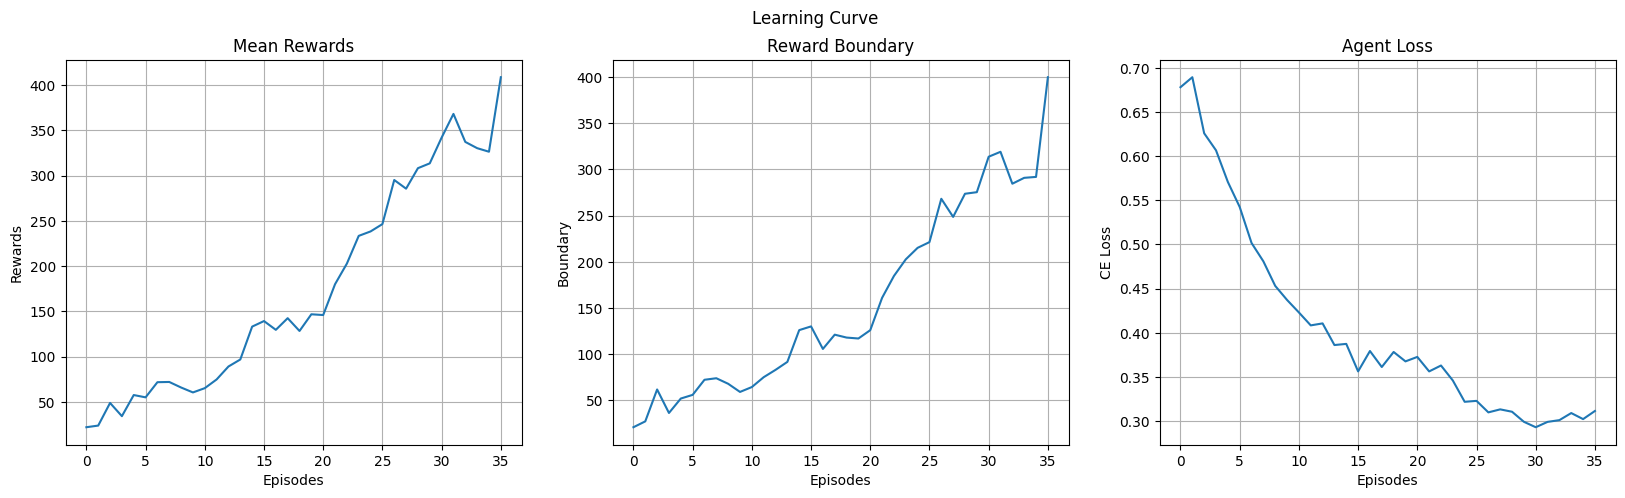

In [115]:
plt.figure(figsize=(20, 5))
plt.suptitle("Learning Curve")

plt.subplot(1, 3, 1)
plt.plot(mean_rewards)
plt.title("Mean Rewards")
plt.xlabel("Episodes")
plt.ylabel("Rewards")
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(reward_bounds)
plt.title("Reward Boundary")
plt.xlabel("Episodes")
plt.ylabel("Boundary")
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(agent_loss)
plt.title("Agent Loss")
plt.xlabel("Episodes")
plt.ylabel("CE Loss")
plt.grid()

plt.show()

What's the most awesome feature of the gym? Is the feature to record **the Agent**, **playing in the environment**. The below cell does exactly the same.

In [ ]:
os.makedir("./AgentVideos")

In [116]:
for i in range(1, 11):
    obs = env.reset()
    video = VideoRecorder(env, f"./AgentVideos/CartPoleAgent_{i}.mp4")

    done = False
    while not done:

        action = act(agent(torch.FloatTensor([obs])))
        obs, reward, done, _ = env.step(action)
        video.capture_frame()

    video.close()

  logger.deprecation(

  logger.deprecation(



FileNotFoundError: ignored

In [ ]:
videoN = np.random.randint(1, 11)
print(f"Showing: ./AgentVideos/CartPoleAgent_{videoN}.mp4")
moviepy.editor.ipython_display(f"./AgentVideos/CartPoleAgent_{videoN}.mp4")

# **Drawbacks 🥲**

---

The pivotal driver behind the success of the cross-entropy method lies in the **instantaneous rewards** garnered by the agent following each action taken. However, when operating within environments that **don't offer immediate rewards** for **every action**, this method encounters a **substantial hurdle.**

In such cases, **the expected convergence** to **an optimal solution** is impeded, primarily due to the **absence or delay of immediate feedback**. This challenge significantly impacts the **agent's learning trajectory** and its **ability to converge efficiently**.

This is because majority of the **elite cases** contains **0 rewards** because there are **no immediate rewards**. Some potential solutions are:

1. **Larger Batch Size**: Increasing the batch size will result in more Episodes with positive rewards.

2. **Replay Buffer**: We need to maintain a record of the previous few good exeperiences, the agent get to see these experiences again and again during training.

3. **Small Learning Rate**: This allow the Agent to slowly explore the environment which inturn allows for carefull examination.

4. **Longer Trainig Time**: The most simplest thing is to allow the model to spend huge amount of time in the Environment.

One such environment is Frozen Lake.

---

That's all for this notebook/kernel, see you in next one.

**DeepNets**